In [ ]:
#Using This dataset (Mall_Customers.csv) fit the K-means clustering Algorithm and find the optimal Number of Cluster using several  Method.

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


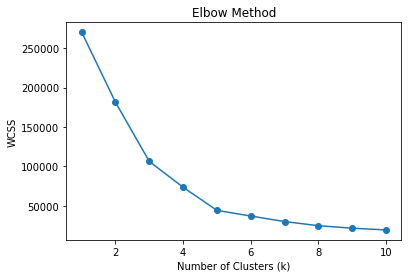

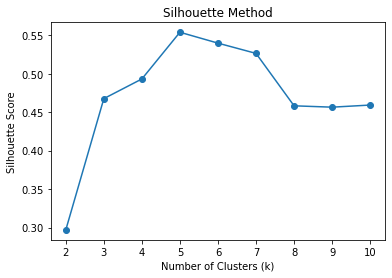

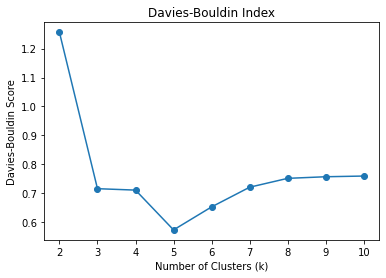

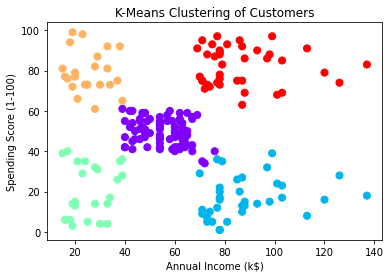

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 2: Select features for clustering
# Common choice: Annual Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Step 4: Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

# Step 5: Davies-Bouldin Score
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    db = davies_bouldin_score(X, labels)
    db_scores.append(db)

plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Index")
plt.show()

# Step 6: Fit final clustering model (e.g., k=5 from elbow)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Step 7: Final Clusters Visualization
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],
            c=df['Cluster'], cmap='rainbow', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering of Customers")
plt.show()
